## 今天的作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，我們取 Titanic_train.csv 的年齡資料，試著將課堂中所學的方法應用上去。

* Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。  
* Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。  
*  Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline


#顯示所有行
pd.set_option('display.max_columns', None)
#顯示所有列
pd.set_option('display.max_rows', None)
#顯示行設定
pd.set_option('max_colwidth',100)

import pingouin as pg
import researchpy   
 

0.23.2


## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
#1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
#2.把題目中的 Survived 用 Survived_cate 來做分析    
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')
# print(df_train.info())
print(df_train['Survived_cate'].dtype, df_train['Survived'].dtype)

object int64


In [4]:
#我們先把遺失值刪除
## 取出資料後，把遺失值刪除
complete_data=df_train[['Age','Survived_cate','Sex']].dropna()
display(complete_data.head(5))
display(complete_data.info())

,Age,Survived_cate,Sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            714 non-null    float64
 1   Survived_cate  714 non-null    object 
 2   Sex            714 non-null    object 
dtypes: float64(1), object(2)
memory usage: 22.3+ KB


None

### Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。


In [5]:
complete_data['Ageabove65'] = complete_data['Age'].apply(lambda x: 'Y' if x > 65 else 'N')
display(complete_data.head(5))

,Age,Survived_cate,Sex,Ageabove65
0,22.0,0,male,N
1,38.0,1,female,N
2,26.0,1,female,N
3,35.0,1,female,N
4,35.0,0,male,N


### Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。
* 暗示: 觀看下面影片找答案，https://www.youtube.com/watch?v=X2d-wUt5azY

In [6]:
complete_data['Age_above65_female'] = pd.Series((complete_data.Age > 65) | (complete_data.Sex == 'female'))
complete_data['Age_above65_female'] = complete_data['Age_above65_female'].apply(lambda x: 'Y' if x else 'N')
display(complete_data.head(10))
display(complete_data.info())

,Age,Survived_cate,Sex,Ageabove65,Age_above65_female
0,22.0,0,male,N,N
1,38.0,1,female,N,Y
2,26.0,1,female,N,Y
3,35.0,1,female,N,Y
4,35.0,0,male,N,N
6,54.0,0,male,N,N
7,2.0,0,male,N,N
8,27.0,1,female,N,Y
9,14.0,1,female,N,Y
10,4.0,1,female,N,Y


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 714 non-null    float64
 1   Survived_cate       714 non-null    object 
 2   Sex                 714 non-null    object 
 3   Ageabove65          714 non-null    object 
 4   Age_above65_female  714 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.5+ KB


None

### Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?
* 提示:    
  首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     

In [7]:
# categorical vs categorical
# check Ageabove65
countTable = pd.crosstab(complete_data['Survived_cate'], complete_data['Ageabove65'])
df = min(countTable.shape[0], countTable.shape[1]) - 1
print('degree of freedom =', df)
crosstab, res = researchpy.crosstab(complete_data['Ageabove65'], complete_data['Survived_cate'], test='chi-square')
print(crosstab)
print(res)
print("Cramer's value is",res.loc[2,'results'])
print('since df = 1 and V < 0.1, level of correlation is negligible')

degree of freedom = 1
              Survived_cate          
Survived_cate             0    1  All
Ageabove65                           
N                       417  289  706
Y                         7    1    8
All                     424  290  714
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    2.6517
1                    p-value =    0.1034
2               Cramer's phi =    0.0609
Cramer's value is 0.0609
since df = 1 and V < 0.1, level of correlation is negligible


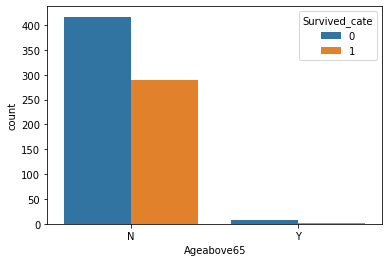

In [8]:
g = sns.countplot(x = 'Ageabove65', hue = 'Survived_cate', data = complete_data)

In [9]:
# categorical vs categorical
# check Age_above65_female
countTable = pd.crosstab(complete_data['Survived_cate'], complete_data['Age_above65_female'])
df = min(countTable.shape[0], countTable.shape[1]) - 1
print('degree of freedom =', df)
crosstab, res = researchpy.crosstab(complete_data['Age_above65_female'], complete_data['Survived_cate'], test='chi-square')
print(crosstab)
print(res)
print("Cramer's value is",res.loc[2,'results'])
print('since df = 1 and 0.5 < V, level of correlation is high')

degree of freedom = 1
                   Survived_cate          
Survived_cate                  0    1  All
Age_above65_female                        
N                            353   92  445
Y                             71  198  269
All                          424  290  714
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   194.7511
1                    p-value =     0.0000
2               Cramer's phi =     0.5223
Cramer's value is 0.5223
since df = 1 and 0.5 < V, level of correlation is high


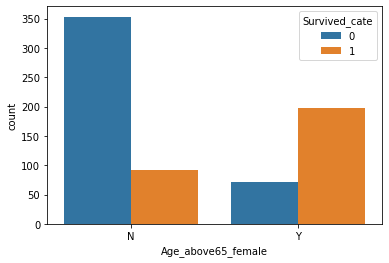

In [10]:
g = sns.countplot(x = 'Age_above65_female', hue = 'Survived_cate', data = complete_data)

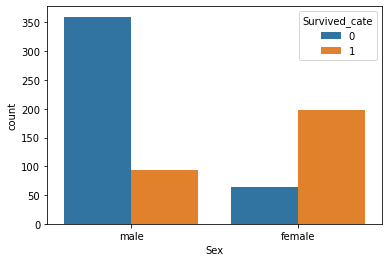

In [11]:
#Notice that the correlation between sex and survived_cate is high
g = sns.countplot(x = 'Sex', hue = 'Survived_cate', data = complete_data)